In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from diffusionpy import D_Matrix,Diffusion_MS_iter,Diffusion_MS,time_dep_surface_cryst,lngi,vpure,dlnai_dlnxi,Gammaij
import matplotlib.pyplot as plt

In [2]:
crystallize=np.asarray([False,False,True])
mobile=np.asarray([True,False,False])
mobiles=np.where(mobile)[0]
immobiles=np.where(~mobile)[0]
deltaHSL=np.asarray([31500.])
# deltaHSL=np.asarray([39300.])#IND
TSL=np.asarray([429.47])
# TSL=np.asarray([433.25])#IND
cpSL=np.asarray([87.44])
# cpSL=np.asarray([116.95])#IND

In [3]:
data=np.asarray([[0.,	0.27288],
       [0.05   , 0.23445],
       [0.1    , 0.19755],
       [0.15   , 0.17761],
       [0.2    , 0.16723],
       [0.25   , 0.15672],
       [0.3    , 0.14609],
       [0.35   , 0.13535],
       [0.45   , 0.11365],
       [0.5    , 0.10276],
       [0.55   , 0.09191],
       [0.6    , 0.0812 ],
       [0.65   , 0.07075],
       [0.7    , 0.0607 ],
       [0.75   , 0.05123],
       [0.8    , 0.04251],
       [0.85   , 0.03468],
       [0.9    , 0.03224],
       [0.95   , 0.0312 ],
       [1.     , 0.03033]])
ww=data[:,1] #np.asarray([0.27087,0.22302, 0.13792, 0.09208, 0.06118])
dl=data[:,0] #np.asarray([0,0.1 , 0.3 , 0.5 , 0.68])
DAPI=np.asarray([6.59010330e-17])
sigma=np.asarray([1.97730286e-02])
kt=np.asarray([5.0778700e-12])
g=np.asarray([3.2])
Mi=np.asarray([18.015,65000.,230.26])
rho0i=np.asarray([997.,1180.,1320.])

In [4]:
wv_fun=interp1d(dl,ww,bounds_error=False,fill_value=(np.max(ww),np.min(ww)))

In [5]:
nc=3
wv0=0.00001
dl0=0.68
wi0=np.asarray([wv0,(1-wv0)*(1-dl0),(1-wv0)*dl0])
wv8=wv_fun(dl0)
wi8=np.asarray([wv8,(1-wv8)*(1-dl0),(1-wv8)*dl0])
T=298.15
temp=T
p=1E5

In [6]:
kij=D_Matrix(np.asarray([-0.128,0.00648,-0.0574]),nc)
par={"mi":np.asarray([1.20469,2420.99, 8.105152]),
"si": np.asarray([2.797059952,2.947, 2.939]),
"ui" :np.asarray([353.95,205.27, 229.45]),
"eAi" :np.asarray([2425.67,0., 934.2]),
"kAi":np.asarray([0.04509,0.02, 0.02]),
"NAi":np.asarray([1.,653., 2.]),
"Mi": Mi,
"kij":kij,
"kijA":np.asarray([[0.]])}

#IND
# kij=D_Matrix(np.asarray([-0.0621,-0.025,-0.156]),nc)
# par={"mi":np.asarray([14.283,2420.99,1.2046 ]),
# "si": np.asarray([3.535,2.947, 2.797059952]),
# "ui" :np.asarray([262.79,205.27,353.95 ]),
# "eAi" :np.asarray([886.4,0.,2425.67 ]),
# "kAi":np.asarray([ 0.02,0.02,0.04509 ]),
# "NAi":np.asarray([3.,653., 1.]),
# "Mi": Mi,
# "kij":kij,
# "kijA":np.asarray([[0.]])}


In [7]:
vpures=vpure(p,T,**par)

In [8]:
par["vpure"]=vpures
lngi_fun=lambda wi: lngi(T,np.ascontiguousarray(wi),**par)

------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0347926 seconds ----------------
------------- Initialization and postprocessing took 0.0146984 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1974598 seconds ----------------
------------- Initialization and postprocessing took 8.4102503 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2399254 seconds ----------------
------------- Initialization and postprocessing took 0.0640428 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling too

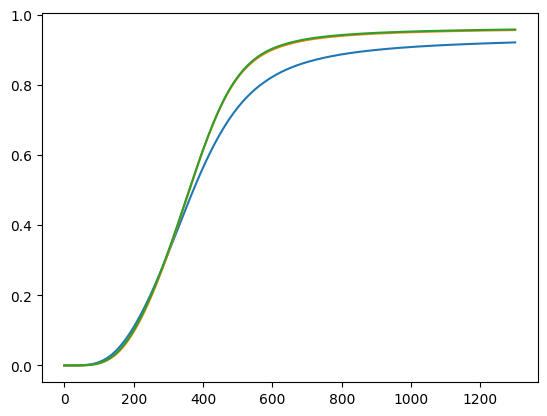

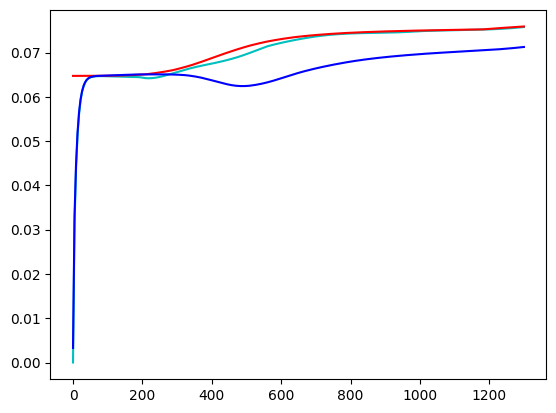

In [9]:
nt=300
tnuc=0.
import scipy
t=np.linspace(0,1300,nt)*60
lngit=scipy.interpolate.interp1d(t,np.asarray([lngi_fun((wi0+wi8)/2)]*len(t)),axis=0,bounds_error=False)

witB,alphaB,r=time_dep_surface_cryst(t,mobiles,immobiles,crystallize,wi0,wi8,rho0i,Mi,DAPI,sigma,kt,g,deltaHSL,TSL,cpSL,tnuc,temp,lngit,wv_fun)

lngit=scipy.interpolate.interp1d(t,np.asarray([lngi_fun(val) for val in witB.T]),axis=0,bounds_error=False)
witB,alphaB,r=time_dep_surface_cryst(t,mobiles,immobiles,crystallize,wi0,wi8,rho0i,Mi,DAPI,sigma,kt,g,deltaHSL,TSL,cpSL,tnuc,temp,lngit,wv_fun)
lngit=scipy.interpolate.interp1d(t,np.asarray([lngi_fun(val) for val in witB.T]),axis=0,bounds_error=False)
witB,alphaB,r=time_dep_surface_cryst(t,mobiles,immobiles,crystallize,wi0,wi8,rho0i,Mi,DAPI,sigma,kt,g,deltaHSL,TSL,cpSL,tnuc,temp,lngit,wv_fun)
lngit=scipy.interpolate.interp1d(t,np.asarray([lngi_fun(val) for val in witB.T]),axis=0,bounds_error=False)
witB,alphaB,r=time_dep_surface_cryst(t,mobiles,immobiles,crystallize,wi0,wi8,rho0i,Mi,DAPI,sigma,kt,g,deltaHSL,TSL,cpSL,tnuc,temp,lngit,wv_fun)
lngit=scipy.interpolate.interp1d(t,np.asarray([lngi_fun(val) for val in witB.T]),axis=0,bounds_error=False)
witB,alphaB,r=time_dep_surface_cryst(t,mobiles,immobiles,crystallize,wi0,wi8,rho0i,Mi,DAPI,sigma,kt,g,deltaHSL,TSL,cpSL,tnuc,temp,lngit,wv_fun)
tmin=t/60
# fig1,ax1=plt.subplots()
# fig2,ax2=plt.subplots()
# ax1.plot(tmin,alpha)
# rmu=r/1E-6
# ax2.plot(tmin,rmu)
# import pandas as pd
# pd.DataFrame((tmin,alpha,rmu)).to_clipboard()
# plt.plot(t/60,witB[0,:])
# plt.plot(t/60,witB[1,:])
# plt.plot(t/60,witB[2,:])
Dvec=np.asarray([5E-13,5E-13,5E-13])
# Dvec=np.asarray([1.5E-13,1.5E-13,1.5E-13])
# Dvec=np.asarray([2E-13,2E-13,2E-13])
L=2.5E-5
dlnai_dlnwi_fun=lambda wi: Gammaij(T,wi,par)
fig,ax=plt.subplots()
fig1,ax1=plt.subplots()
ax.plot(t/60,alphaB)

# wt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,witB=np.ascontiguousarray(witB.T))
wt,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,full_output=True,witB=np.ascontiguousarray(witB.T))
# wt,wtz,zvec,Lt=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,Mi,mobile,full_output=True,witB=np.ascontiguousarray(witB.T),dlnai_dlnwi_fun=dlnai_dlnwi_fun)
XwL=wt[:,0]/(1-wt[:,0])
Xw=XwL*(1-alphaB*dl0)
ww=Xw/(1+Xw)
pd.DataFrame((tmin,ww)).T.to_clipboard(excel=True, sep=None, index=False, header=None)
ax1.plot(t/60,ww,'c-',label="Non-ideal and wiB(t)")
# wtz=np.asarray([witB for i in range(21)]).T
# wt,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,full_output=True,dlnai_dlnwi_fun=dlnai_dlnwi_fun)
for i in range(3):
        # wtz=np.asarray([witB for i in range(21)]).T
        lngi_tz=np.asarray([[lngi_fun(np.ascontiguousarray(col)) for col in row.T] for row in wtz])
        wt,wtz,zvec,Lt,alphatz,r=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,witB=np.ascontiguousarray(witB.T),deltaHSL=deltaHSL,TSL=TSL,cpSL=cpSL,crystallize=crystallize,sigma=sigma,temp=temp,DAPI=DAPI,kt=kt,g=g,full_output=True,lngi_tz=lngi_tz,nz=20,dlnai_dlnwi_fun=dlnai_dlnwi_fun)
        # wt,wtz,zvec,Lt,alphatz,r=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,Mi,mobile,witB=np.ascontiguousarray(witB.T),deltaHSL=deltaHSL,TSL=TSL,cpSL=cpSL,crystallize=crystallize,sigma=sigma,temp=temp,DAPI=DAPI,kt=kt,g=g,full_output=True,lngi_tz=lngi_tz,nz=20,dlnai_dlnwi_fun=dlnai_dlnwi_fun)
        alpha=np.average(alphatz,axis=0)
ax.plot(t/60,alpha)
ax.plot(t/60,alphatz[-1,:])

# wt=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,Mi,mobile,witB=np.ascontiguousarray(witB.T),dlnai_dlnwi_fun=dlnai_dlnwi_fun)
XwL=wtz[:,0,:]/(1-wtz[:,0,:])
Xw=XwL*(1-alphatz.T*dl0)
Xw=np.average(Xw,axis=1)
ww=Xw/(1+Xw)

XwBL=witB[0,:]/(1-witB[0,:])
XwB=XwBL*(1-alphaB*dl0)
wiB=XwB/(1+XwB)

ax1.plot(t/60,wiB,"r-")
ax1.plot(t/60,ww,'b-',label="Non-ideal and wiB(t)")
plt.show()
# plt.legend("")
# plt.show()

pd.DataFrame((tmin,ww)).T.to_clipboard(excel=True, sep=None, index=False, header=None)

pd.DataFrame((tmin,wiB)).T.to_clipboard(excel=True, sep=None, index=False, header=None)